# Diabetes Prediction System

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing libraries for prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# loading dataset
data_frame = pd.read_csv("diabetes.csv")
data_frame

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

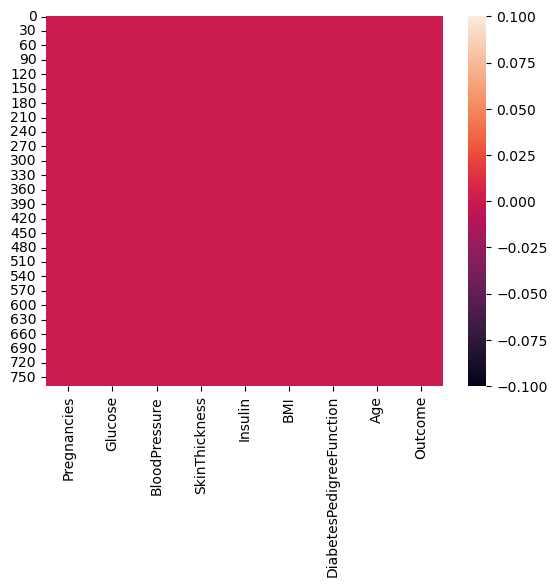

In [4]:
# checking for missing values
sns.heatmap(data_frame.isnull())

In [5]:
# correlation matrix
correlation = data_frame.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

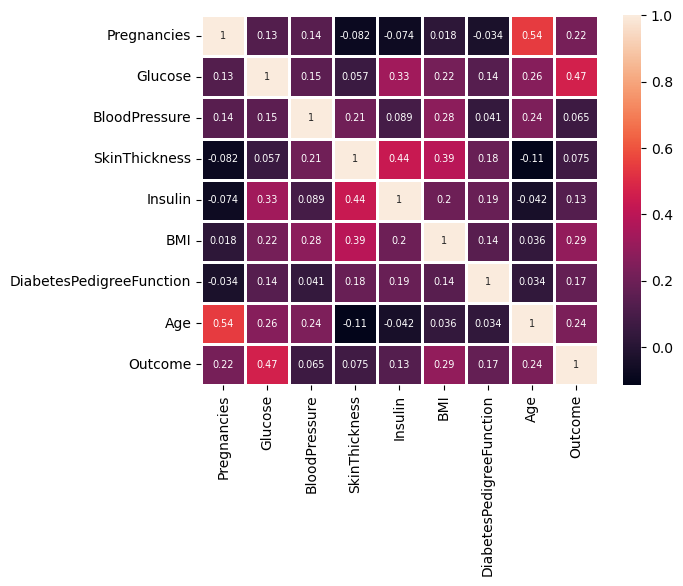

In [6]:
# visualising the correlation
sns.heatmap(correlation, annot=True, annot_kws={"size":7}, linewidths=0.75)

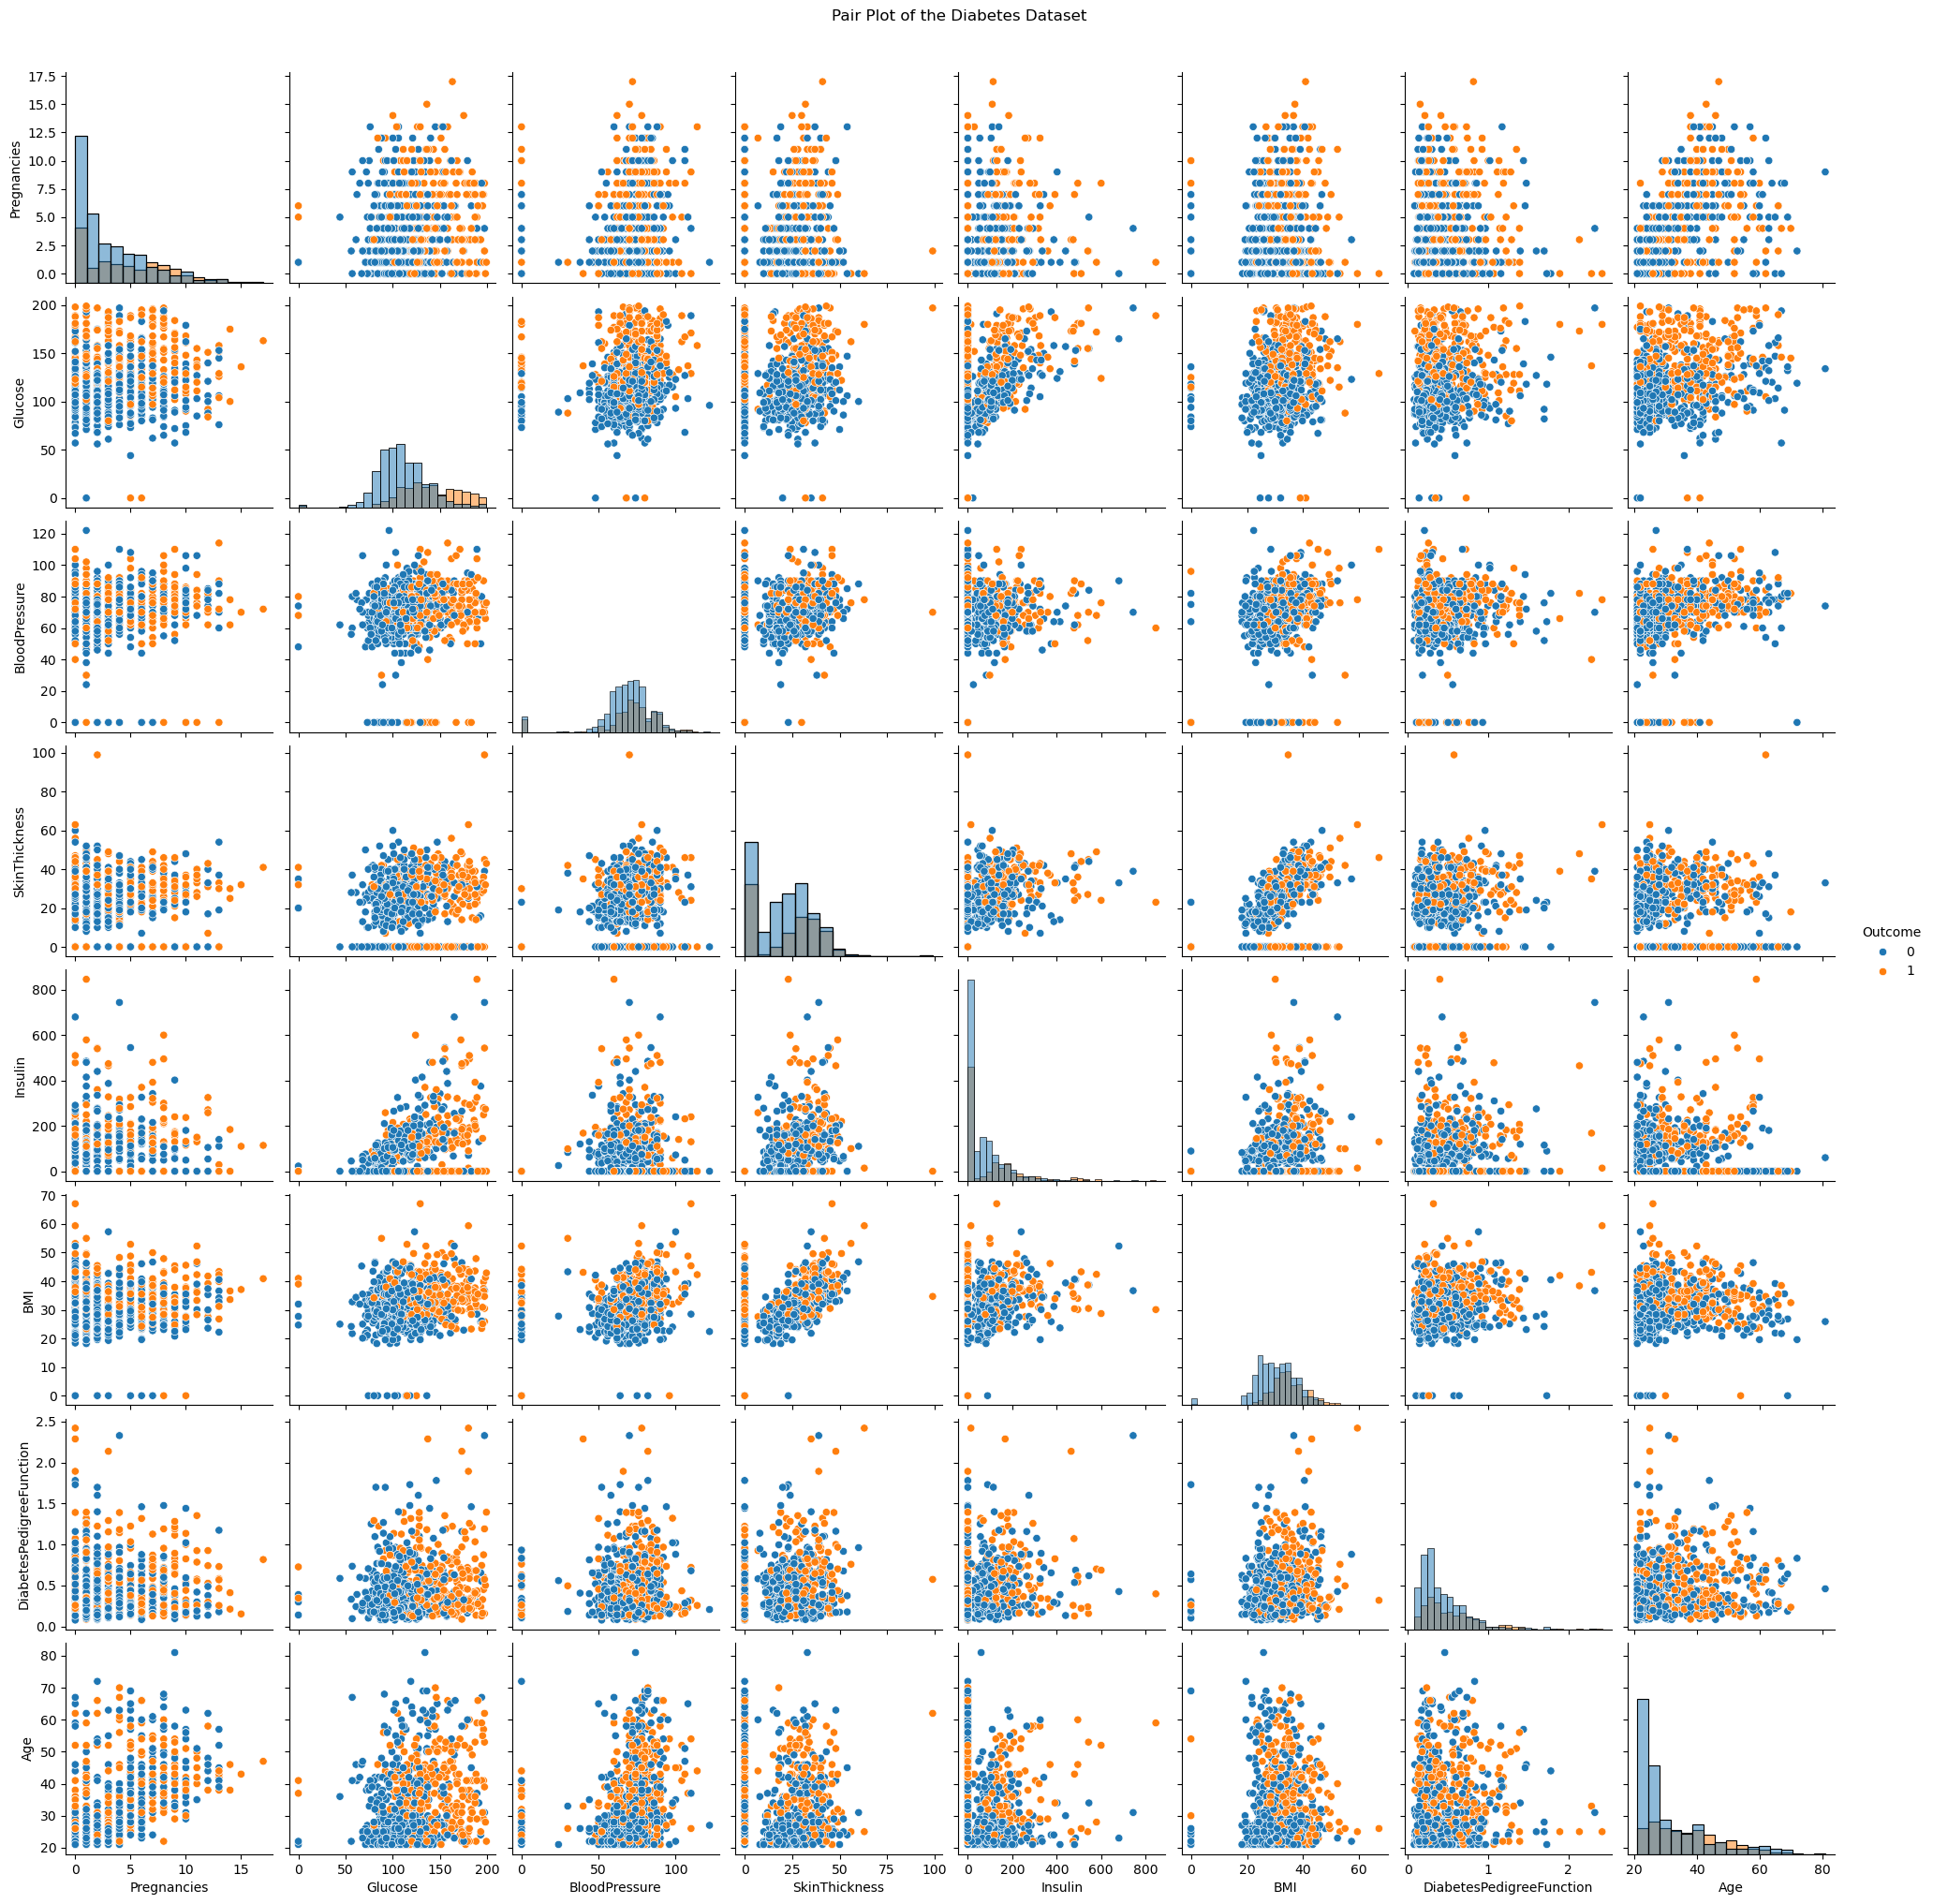

In [12]:
sns.pairplot(data_frame, hue="Outcome", diag_kind="hist")
plt.suptitle("Pair Plot of the Diabetes Dataset", y=1.02)
plt.show()

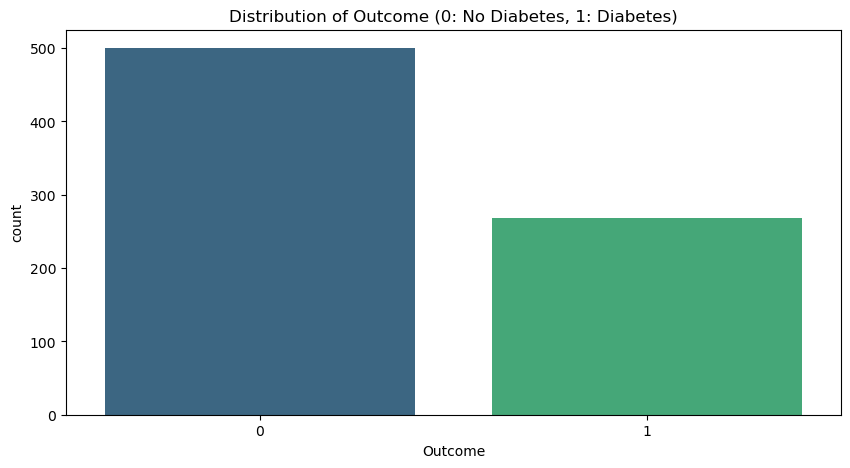

In [20]:
plt.figure(figsize=[10, 5])
sns.countplot(x="Outcome", data=data_frame, hue="Outcome", palette="viridis", legend=False)
plt.title("Distribution of Outcome (0: No Diabetes, 1: Diabetes)")
plt.show()

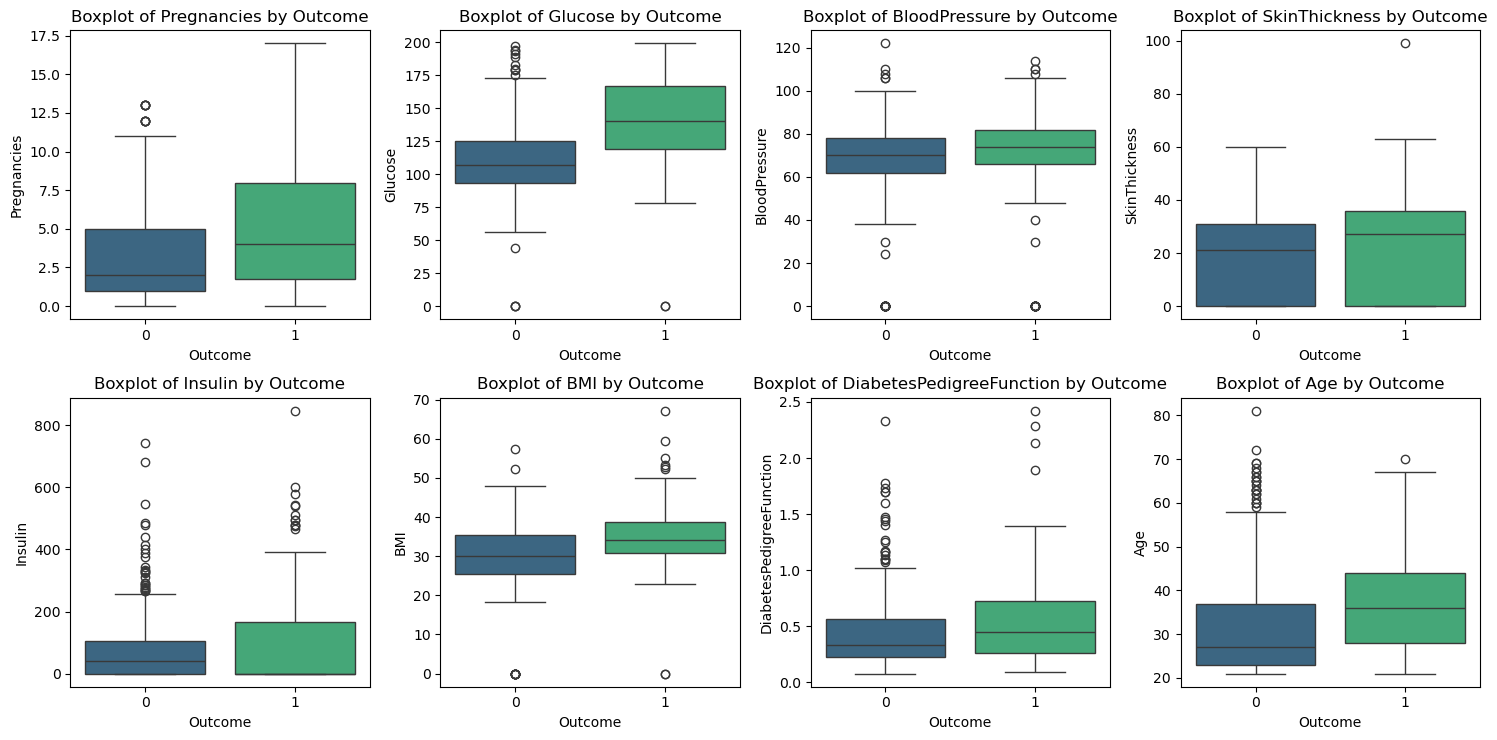

In [21]:
plt.figure(figsize=[15, 7.5])
for index, column in enumerate(data_frame.columns[:-1], 1):
    plt.subplot(2, 4, index)
    sns.boxplot(x="Outcome", y=column, data=data_frame, hue="Outcome", palette="viridis", legend=False)
    plt.title("Boxplot of {} by Outcome".format(column))
plt.tight_layout()
plt.show()

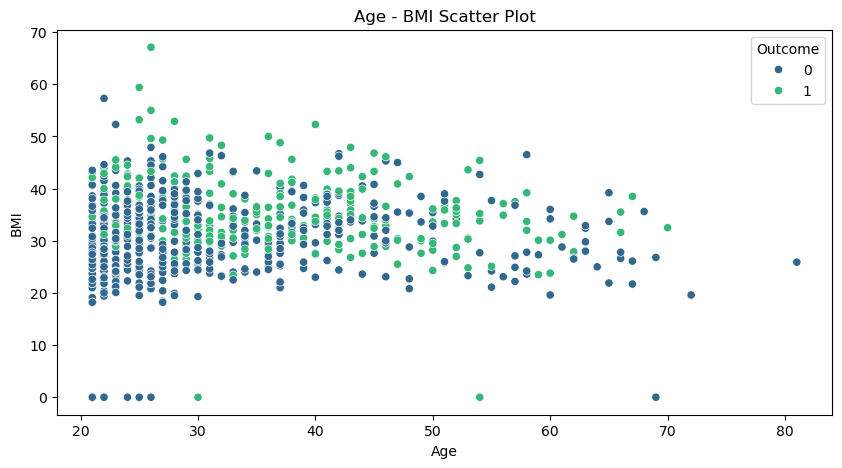

In [17]:
# Age - BMI Scatter Plot
plt.figure(figsize=[10, 5])
sns.scatterplot(x="Age", y="BMI", hue="Outcome", data=data_frame, palette="viridis")
plt.title("Age - BMI Scatter Plot")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

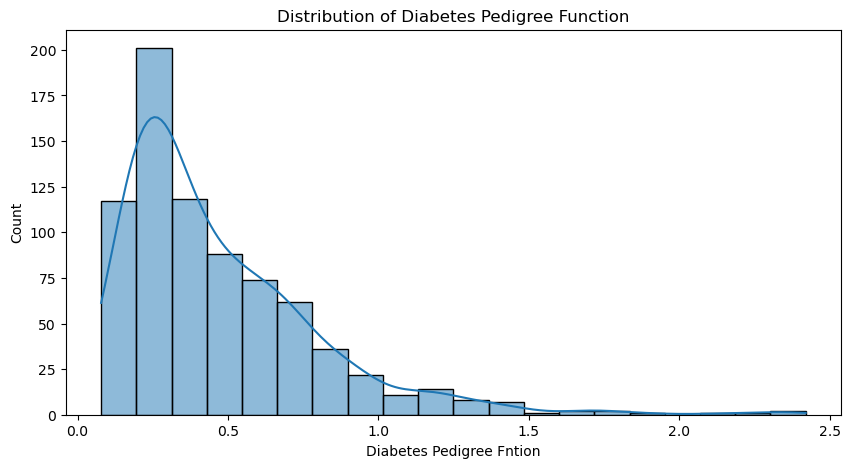

In [25]:
# Diabetes Pedigree Function Distribution
plt.figure(figsize=[10, 5])
sns.histplot(data_frame["DiabetesPedigreeFunction"], bins=20, kde=True)
plt.title("Distribution of Diabetes Pedigree Function")
plt.xlabel("Diabetes Pedigree Fntion")
plt.show()

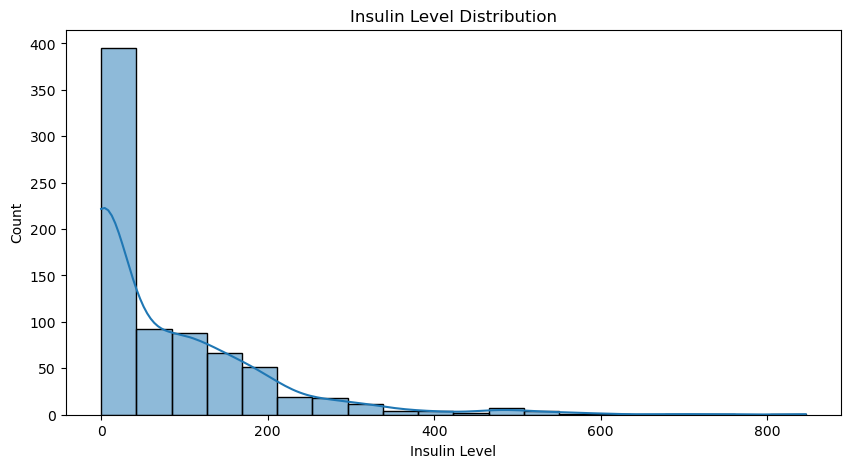

In [26]:
# Insulin level distribution
plt.figure(figsize=[10, 5])
sns.histplot(data_frame["Insulin"], bins=20, kde=True)
plt.title("Insulin Level Distribution")
plt.xlabel("Insulin Level")
plt.show()

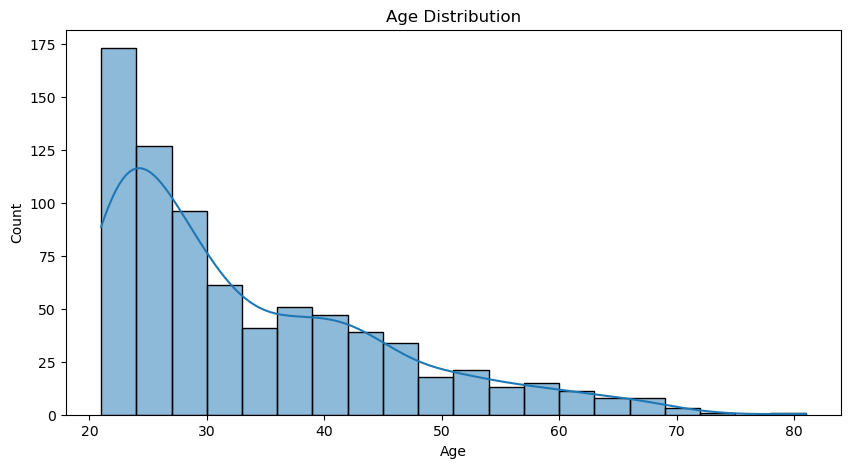

In [27]:
# Age distribution
plt.figure(figsize=[10, 5])
sns.histplot(data_frame["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

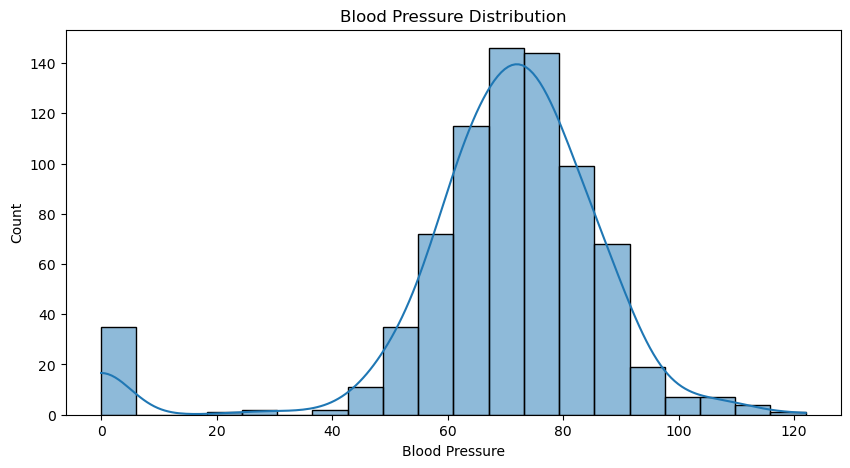

In [28]:
# Blood Pressure Distribution
plt.figure(figsize=[10, 5])
sns.histplot(data_frame["BloodPressure"], bins=20, kde=True)
plt.title("Blood Pressure Distribution")
plt.xlabel("Blood Pressure")
plt.show()

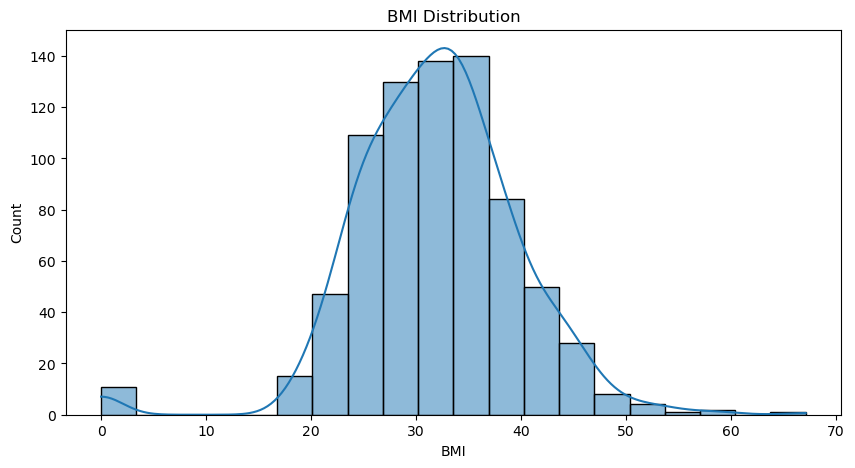

In [30]:
# BMI Distribution
plt.figure(figsize=[10, 5])
sns.histplot(data_frame["BMI"], bins=20, kde=True)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.show()

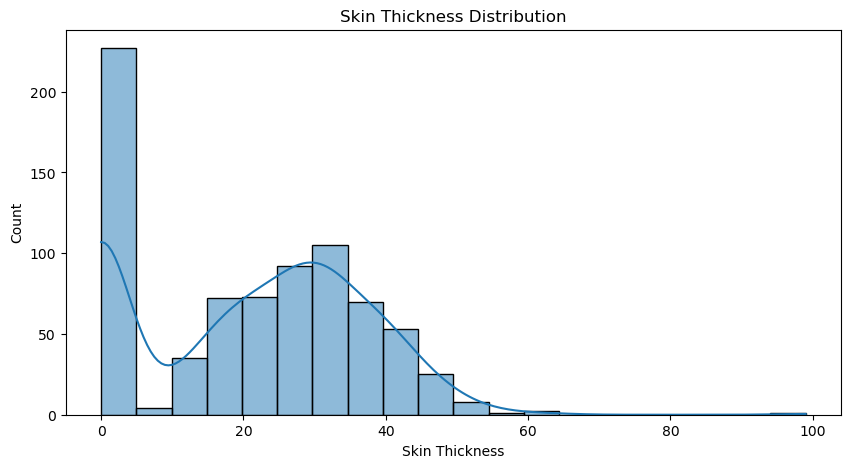

In [31]:
# Skin Thickness Distribution
plt.figure(figsize=[10, 5])
sns.histplot(data_frame["SkinThickness"], bins=20, kde=True)
plt.title("Skin Thickness Distribution")
plt.xlabel("Skin Thickness")
plt.show()

In [7]:
# training the model with train test split technique
X = data_frame.drop("Outcome", axis=1)
Y = data_frame["Outcome"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [8]:
# training the model
model = LogisticRegression(solver="newton-cg", max_iter=3000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=3000, solver='newton-cg')

In [9]:
# making prediction
prediction = model.predict(X_test)
prediction

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [10]:
# calculating accuracy
accuracy = accuracy_score(prediction, Y_test)
accuracy * 100

79.22077922077922